In [1]:
# an open-source platform for machine learning.
import tensorflow as tf
# Imports specific modules (datasets, layers, and models) from TensorFlow's Keras API,
# which is used for building and training neural networks.
from tensorflow.keras import datasets, layers, models
# Imports the pyplot module from matplotlib, a popular plotting library in Python, for visualizing data and results.
import matplotlib.pyplot as plt
# os module, which provides a way to interact with the operating system, such as checking if a file exists.
import os

In [8]:
# Load and preprocess data
# Loads the CIFAR-10 dataset, which consists of 60,000 32x32 color images in 10 different classes.
# The dataset is split into training data (train_images and train_labels) and test data (test_images and test_labels).
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
# Normalizes the pixel values of the images by dividing them by 255.0 to scale them between 0 and 1.
# This is important for neural network training.
train_images, test_images = train_images / 255.0, test_images / 255.0

In [3]:
#
class_names = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

In [10]:
# Defines the file path where the trained model will be saved or loaded from.
# The file extension .h5 is used for saving Keras models.
model_path = "cifar10_cnn_model.h5"

In [11]:
# Checks if the model file already exists at the specified path.
if os.path.exists(model_path):
    # Load the model if it exists
    model = tf.keras.models.load_model(model_path)
    print("Model loaded from disk.")
else:
    # Build and train the model if it doesn't exist
    # Initializes a Sequential model in Keras.The model is defined as a linear stack of layers.
    model = models.Sequential(
        [
            # Adds a 2D convolutional layer with 32 filters,a kernel size of (3, 3),  and ReLU activation.
            # The first layer also specifies the input shape (32, 32, 3) for 32x32 RGB images.
            layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)),
            # Adds a max-pooling layer with a pool size of (2, 2), reducing the spatial dimensions of the feature maps.
            layers.MaxPooling2D((2, 2)),
            # Adds another 2D convolutional layer with 64 filters, a kernel size of (3, 3), and ReLU activation.
            layers.Conv2D(64, (3, 3), activation="relu"),
            # Adds another max-pooling layer to reduce the dimensions further
            layers.MaxPooling2D((2, 2)),
            # Adds another convolutional layer with 64 filters, a kernel size of (3, 3), and ReLU activation.
            layers.Conv2D(64, (3, 3), activation="relu"),
            # Flattens the 3D output of the convolutional layers into a 1D array to prepare it for the fully connected (dense) layers.
            layers.Flatten(),
            # Adds a fully connected (dense) layer with 64 units and ReLU activation.
            layers.Dense(64, activation="relu"),
            # Adds the final output layer with 10 units (one for each class) without an activation function (since logits will be used).
            layers.Dense(10),
        ]
    )

    model.compile(
        # Configures the model for training by specifying the optimizer (adam)
        optimizer="adam",
        # loss function (SparseCategoricalCrossentropy
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        #  and evaluation metric (accuracy).
        metrics=["accuracy"],
    )
    # Trains the model on the training data for 10 epochs while using the test data for validation.
    
    model.fit(
        train_images,
        train_labels,
        epochs=10,
        validation_data=(test_images, test_labels),
    )

    # Saves the trained model to disk at the specified path
    model.save(model_path)
    print("Model saved to disk.")

c:\Users\MHDAH\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 26ms/step - accuracy: 0.3570 - loss: 1.7312 - val_accuracy: 0.5610 - val_loss: 1.2309
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.5858 - loss: 1.1703 - val_accuracy: 0.6436 - val_loss: 1.0074
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.6586 - loss: 0.9709 - val_accuracy: 0.6702 - val_loss: 0.9489
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.7006 - loss: 0.8514 - val_accuracy: 0.6741 - val_loss: 0.9356
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.7247 - loss: 0.7883 - val_accuracy: 0.7006 - val_loss: 0.8692
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.7459 - loss: 0.7188 - val_accuracy: 0.7159 - val_loss: 0.8301
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 21ms/step - accuracy: 0.7665 - loss: 0.6645 - val_accuracy: 0.7114 - val_loss: 0.8412
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.7835 -

Model saved to disk.


In [12]:
# Defines a function classify_image to classify a given image using the trained model.
def classify_image(image):
    #Adds an extra dimension to the image array to create a batch with a single image, as TensorFlow models expect batches as input.
    # Expands the dimensions of the image to match the input shape of the model (1, 32, 32, 3).
    img_array = tf.expand_dims(image, 0)  # Create a batch
    # Predicts the class probabilities for the image using the trained model.
    predictions = model.predict(img_array)
    # Finds the index of the class with the highest predicted probability and converts it to a NumPy integer.
    predicted_class = tf.argmax(predictions[0]).numpy()
    # Returns the name of the predicted class by indexing into the class_names list.
    return class_names[predicted_class]

In [13]:

# Defines a function to display an image along with its predicted class label and the true class label.
def show_image_with_prediction(image, true_label):
    # Gets the predicted class label for the given image.
    predicted_label = classify_image(image)
    # Creates a new figure for plotting.
    plt.figure()
    # Displays the given image.
    plt.imshow(image)
    # Sets the title of the plot to show the predicted and true class labels.
    plt.title(f"Predicted: {predicted_label}, True: {true_label}")
    # Hides the axis for a cleaner visualization.
    plt.axis("off")
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


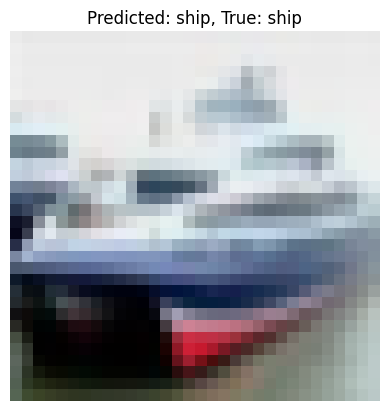

In [16]:
# Classifies the third image in the test dataset and stores the predicted label.
class_pred = classify_image(test_images[1])
# Calls the function to display the third test image along with its predicted class label.
show_image_with_prediction(test_images[1], class_pred)